# Importação de bibliotecas

In [18]:
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier_discriminant import BayesianGaussianDiscriminant
from utils.synthetic_data_generator import SyntheticDatasetGenerator
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [19]:
np.random.seed(42)
CLASSIFIER_NAME = "Bayesian Gaussian Discriminant"
TARGET_COLUMN_NAME = "y"
DATASET_NAME = "Synthetic"
ACTIVITY_NUMBER = 4
TEST_SIZE = 0.3
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Geração de dados sintéticos

In [20]:
features_patterns = {
    "pattern_1": {"pattern": np.array([[2, 2]]), "num_samples": 40, "y": 0},
    "pattern_2": {"pattern": np.array([[1, 3]]), "num_samples": 40, "y": 1},
    "pattern_3": {"pattern": np.array([[3, 3]]), "num_samples": 40, "y": 2},
}

generator = SyntheticDatasetGenerator()
synthetic_df = generator.generate_data(features_patterns)

In [21]:
list(synthetic_df[TARGET_COLUMN_NAME].unique())

[np.int64(0), np.int64(1), np.int64(2)]

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Naive Bayes

In [22]:
bayesian_gaussian_discriminant = ClassifierUtils.create_multiple_holdout_indexes(
    df=synthetic_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)


bayesian_gaussian_discriminant_accuracy_list = []

for train_indexes, test_indexes in bayesian_gaussian_discriminant:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=synthetic_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianDiscriminant(discriminant_type="linear")
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_gaussian_discriminant_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_gaussian_discriminant_df_results = pd.DataFrame(
    bayesian_gaussian_discriminant_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_gaussian_discriminant_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,1.0,0.0,"[107, 6, 49, 16, 119, 45, 19, 99, 100, 33, 21, 48, 95, 76, 40, 35, 37, 111, 97, 7, 32, 115, 51, 46, 82, 23, 53, 25, 12, 81, 39, 80, 79, 64, 41, 56, 20, 36, 104, 113, 9, 42, 94, 60, 91, 58, 74, 15, 26, 61, 63, 108, 103, 27, 114, 3, 57, 84, 44, 10, 85, 106, 30, 105, 11, 73, 112, 47, 52, 70, 5, 71, 78, 116, 34, 75, 90, 117, 38, 18, 1, 0, 101, 96]","[2, 4, 8, 13, 14, 17, 22, 24, 28, 29, 31, 43, 50, 54, 55, 59, 62, 65, 66, 67, 68, 69, 72, 77, 83, 86, 87, 88, 89, 92, 93, 98, 102, 109, 110, 118]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[11, 0, 0], [0, 13, 0], [0, 0, 12]]"
1,1.0,0.0,"[108, 111, 24, 105, 3, 76, 47, 13, 31, 85, 27, 107, 15, 57, 42, 117, 79, 56, 92, 106, 112, 26, 115, 73, 4, 63, 67, 86, 37, 96, 10, 14, 2, 98, 119, 82, 114, 104, 110, 38, 97, 52, 77, 102, 35, 80, 0, 93, 72, 48, 118, 1, 90, 49, 70, 7, 99, 41, 109, 18, 44, 40, 50, 83, 78, 100, 39, 19, 81, 62, 94, 5, 46, 101, 30, 23, 91, 71, 6, 66, 17, 33, 69, 68]","[8, 9, 11, 12, 16, 20, 21, 22, 25, 28, 29, 32, 34, 36, 43, 45, 51, 53, 54, 55, 58, 59, 60, 61, 64, 65, 74, 75, 84, 87, 88, 89, 95, 103, 113, 116]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]","[[14, 0, 0], [0, 14, 0], [0, 0, 8]]"
2,1.0,0.0,"[116, 66, 107, 16, 94, 117, 75, 43, 56, 42, 72, 45, 89, 20, 39, 114, 76, 62, 31, 79, 40, 25, 115, 95, 118, 113, 60, 90, 85, 35, 8, 91, 61, 17, 14, 78, 0, 77, 29, 12, 82, 21, 71, 73, 33, 64, 19, 47, 111, 57, 69, 41, 27, 98, 55, 119, 88, 50, 7, 106, 24, 103, 48, 68, 81, 58, 9, 34, 65, 102, 36, 97, 15, 53, 54, 5, 92, 108, 67, 51, 70, 37, 26, 22]","[1, 2, 3, 4, 6, 10, 11, 13, 18, 23, 28, 30, 32, 38, 44, 46, 49, 52, 59, 63, 74, 80, 83, 84, 86, 87, 93, 96, 99, 100, 101, 104, 105, 109, 110, 112]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[14, 0, 0], [0, 7, 0], [0, 0, 15]]"
3,1.0,0.0,"[111, 3, 91, 83, 9, 99, 77, 117, 72, 109, 87, 66, 18, 76, 10, 52, 84, 29, 50, 25, 43, 24, 6, 86, 56, 59, 61, 68, 96, 23, 54, 63, 70, 73, 85, 4, 80, 95, 88, 21, 45, 92, 39, 116, 64, 112, 107, 58, 101, 53, 11, 103, 1, 115, 44, 105, 13, 55, 94, 65, 51, 62, 90, 71, 12, 8, 36, 100, 14, 47, 75, 41, 108, 49, 0, 104, 19, 113, 37, 32, 89, 93, 34, 31]","[2, 5, 7, 15, 16, 17, 20, 22, 26, 27, 28, 30, 33, 35, 38, 40, 42, 46, 48, 57, 60, 67, 69, 74, 78, 79, 81, 82, 97, 98, 102, 106, 110, 114, 118, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[15, 0, 0], [0, 11, 0], [0, 0, 10]]"
4,1.0,0.0,"[5, 97, 107, 103, 43, 3, 15, 0, 4, 45, 85, 33, 81, 94, 14, 119, 49, 25, 36, 31, 61, 54, 91, 87, 13, 23, 116, 78, 112, 99, 84, 71, 104, 24, 20, 89, 113, 114, 74, 46, 39, 100, 29, 64, 79, 101, 47, 82, 68, 62, 98, 117, 60, 86, 18, 27, 51, 96, 115, 88, 105, 83, 52, 106, 72, 2, 76, 30, 50, 90, 11, 37, 102, 10, 48, 19, 93, 95, 109, 26, 65, 21, 9, 40]","[1, 6, 7, 8, 12, 16, 17, 22, 28, 32, 34, 35, 38, 41, 42, 44, 53, 55, 56, 57, 58, 59, 63, 66, 67, 69, 70, 73, 75, 77, 80, 92, 108, 110, 111, 118]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]","[[13, 0, 0], [0, 17, 0], [0, 0, 6]]"
...,...,...,...,...,...,...
195,1.0,0.0,"[31, 107, 1, 81, 80, 22, 108, 3, 99, 14, 45, 79, 84, 38, 102, 16, 106, 27, 90, 110, 30, 119, 32, 69, 111, 89, 5, 86, 49, 109, 33, 9, 44, 116, 23, 105, 21, 95, 41, 73, 47, 10, 42, 35, 63, 118, 67, 53, 58, 15, 18, 65, 93, 8, 66, 78, 113, 6, 83, 104, 91, 39, 29, 61, 20, 11, 34, 43, 37, 48, 68, 112, 51, 62, 26, 71, 36, 77, 74, 75, 50, 25, 72, 56]","[0, 2, 4, 7, 12, 13, 17, 19, 24, 28, 40, 46, 52, 54, 55, 57, 59, 60, 64, 70, 76, 82, 85, 87, 88, 92, 94, 96, 97, 98, 100, 101, 103, 114, 115, 117]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[1

# Vetor de acurácias

In [23]:
accuracy_vector = pd.Series(bayesian_gaussian_discriminant_df_results["accuracy"])

In [24]:
accuracy_vector

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [25]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Naive Bayes

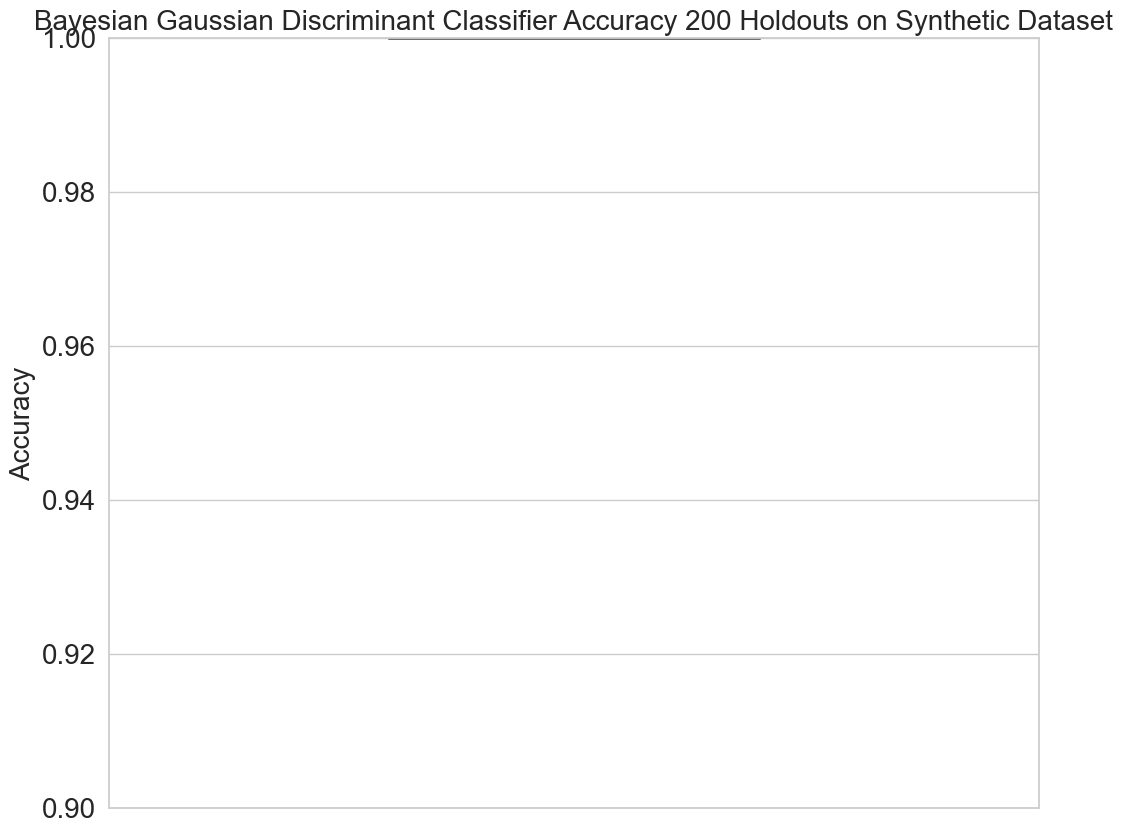

In [26]:
image_type = "boxplot"

image_generator.create_boxplot(
    vector_distribution=accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [27]:
max_accuracy = bayesian_gaussian_discriminant_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_gaussian_discriminant_df_results[
    bayesian_gaussian_discriminant_df_results["accuracy"] == max_accuracy
    ].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_gaussian_discriminant_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_gaussian_discriminant_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=synthetic_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índice selecionado aleatoriamente: 58
Acurácia do índice selecionado: 100.00%


# Resgatando a matriz de confusão e plotando ela

In [28]:
confusion_matrix_result = bayesian_gaussian_discriminant_df_results.loc[index_selected, "confusion_matrix"]

In [29]:
confusion_matrix_result

array([[ 8,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 10]])

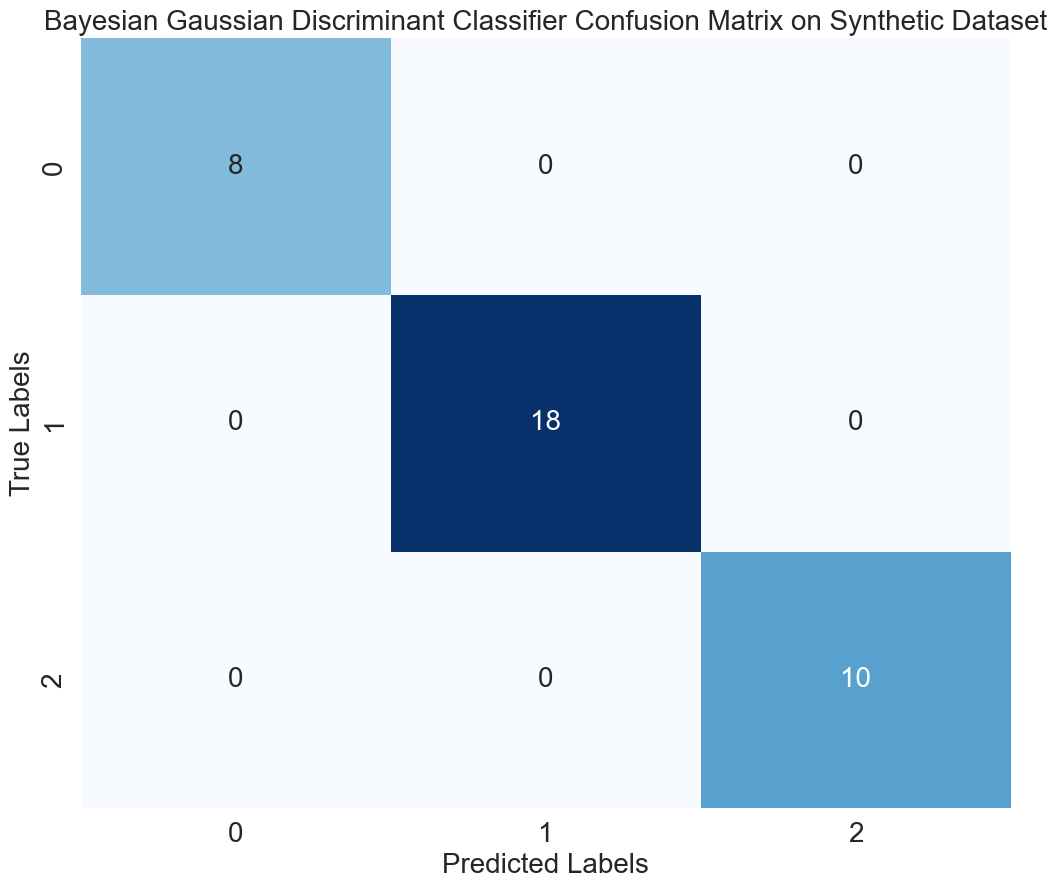

In [30]:
image_type = "confusion_matrix"

image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Naive Bayes baseado em duas features

In [31]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianDiscriminant(discriminant_type="linear")
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

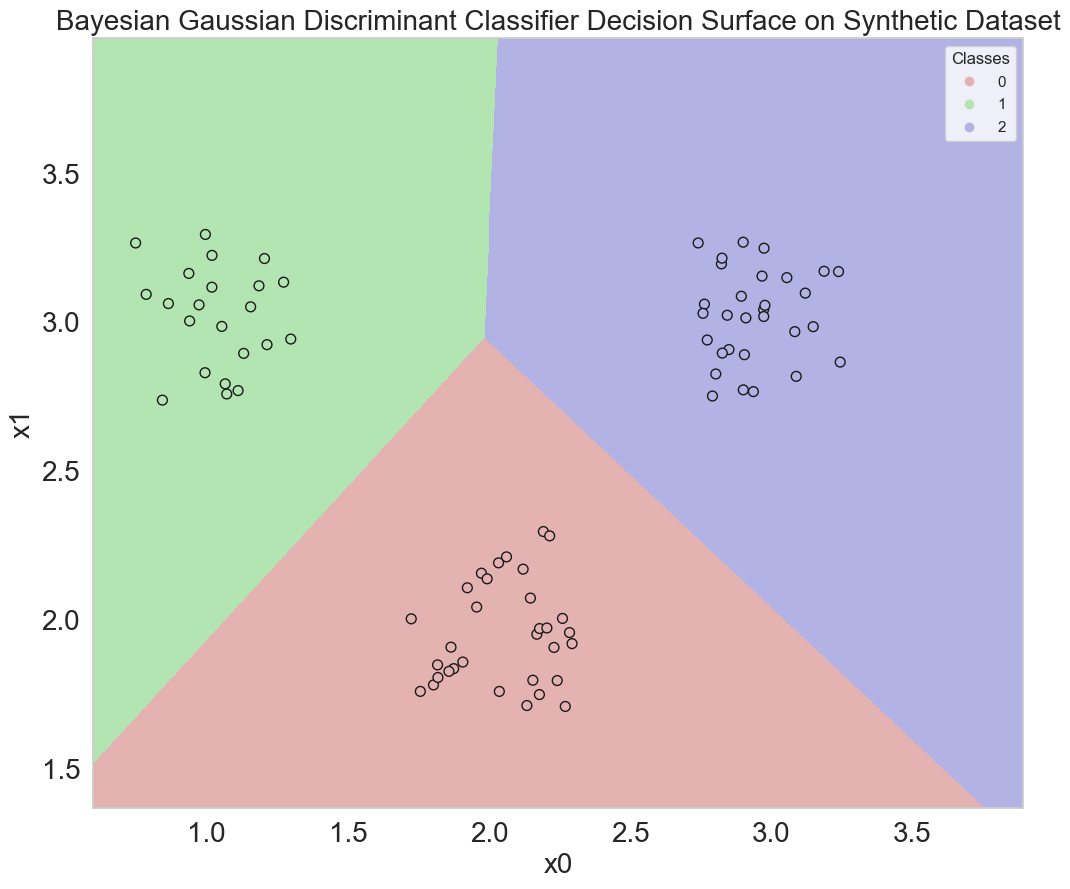

In [32]:
image_type = "decision_surface_linear"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
        num_classes=len(np.unique(y_train)),
    show=True,
)

In [33]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianDiscriminant(discriminant_type="quadratic")
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

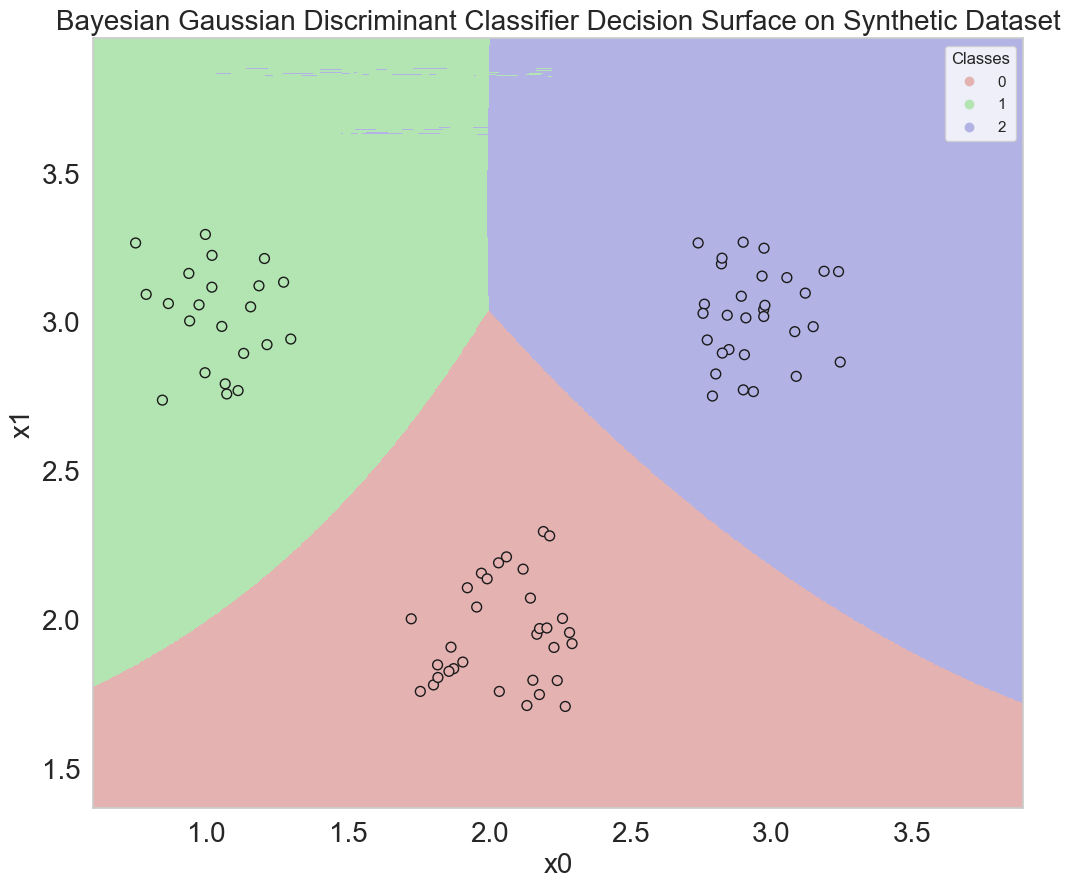

In [34]:
image_type = "decision_surface_quadratic"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
        num_classes=len(np.unique(y_train)),
    show=True,
)